# Born to slide: mobile origin licensing factors confer resistance to transcription conflicts

<img style="float: left;" src="https://icons.iconarchive.com/icons/dan-wiersma/solar-system/48/Mars-icon.png">

## Jupyter notebooks 

#### Figures:
+ 1B
+ S1D

#### Archives:
+ Transcription_licensed-DNA_ATP_LS.yama
+ Transcription_licensed-DNA_ATP_HS.yama
+ Transcription_licensed-DNA_ATPgS_LS.yama
+ Transcription_licensed-DNA_ATPgS_HS.yama
+ Transcription_low-chromatin-licensed-DNA_ATP_1.yama
+ Transcription_high-chromatin-licensed-DNA_ATP.yama
+ Transcription_low-chromatin-licensed-DNA_ATP_2.yama
+ Transcription_low-chromatin-licensed-DNA_ATPgS.yama
+ Photobleaching_licensed-DNA_ATP.yama
+ Photobleaching_licensed-DNA_ATPgS.yama
+ Transcription_licensed-DNA_T7T_ATP.yama
+ Transcription_licensed-DNA_T7T_ATPgS.yama
+ Transcription_ORC-DNA_ATP.yama
+ Transcription_ORC-DNA_T7T_ATP.yama

#### Additional data:
+ none

### Initialize ImageJ

In [1]:
import imagej
ij = imagej.init('/Applications/Fiji.app')
ij.getVersion()

'2.1.0/1.53c'

### Imports

In [2]:
import sys
sys.path.insert(0, '..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import awesome_data
from marspy.convert.archive import DnaMoleculeArchive, instantiate_archive, describe_archives
from tqdm.notebook import tqdm
from functools import reduce

marspy initialized.


### Select archives

In [3]:
selected_archives = ['Transcription_licensed-DNA_ATP_LS.yama',
                     'Transcription_licensed-DNA_ATP_HS.yama',
                     'Transcription_licensed-DNA_ATPgS_LS.yama',
                     'Transcription_licensed-DNA_ATPgS_HS.yama',
                     'Transcription_low-chromatin-licensed-DNA_ATP_1.yama',
                     'Transcription_high-chromatin-licensed-DNA_ATP.yama',
                     'Transcription_low-chromatin-licensed-DNA_ATP_2.yama',
                     'Transcription_low-chromatin-licensed-DNA_ATPgS.yama',
                     'Photobleaching_licensed-DNA_ATP.yama',
                     'Photobleaching_licensed-DNA_ATPgS.yama',
                     'Transcription_licensed-DNA_T7T_ATP.yama',
                     'Transcription_licensed-DNA_T7T_ATPgS.yama',
                     'Transcription_ORC-DNA_ATP.yama',
                     'Transcription_ORC-DNA_T7T_ATP.yama']

### Figure style and output directory

In [4]:
from figure_style import *

In [5]:
set_style_paper()

In [6]:
# change to desired output directory
dir_out = '/Volumes/pool-duderstadt/Matthias/Manuscript/Figures/SVGs/Figure1/'
dir_out

'/Volumes/pool-duderstadt/Matthias/Manuscript/Figures/SVGs/Figure1/'

### Instantiate selected archives

In [7]:
for archive in tqdm(selected_archives):
    instantiate_archive(archive, awesome_data.datasets)

### Archives Overview

In [8]:
describe_archives(DnaMoleculeArchive.instances)

,# of datasets,# of molecules,labeled proteins,nucleotide,HS challenge?,chromatin,terminator?,archive validation
Transcription_licensed-DNA_ATP_LS,1,245,ybbR-LD555-T7; ybbR-LD655-MCM,ATP,False,n/a,False,passed
Transcription_licensed-DNA_ATP_HS,1,330,ybbR-LD555-T7; ybbR-LD655-MCM,ATP,True,n/a,False,passed
Transcription_licensed-DNA_ATPgS_LS,1,283,ybbR-LD555-T7; ybbR-LD655-MCM,ATPgS,False,n/a,False,passed
Transcription_licensed-DNA_ATPgS_HS,1,63,ybbR-LD555-T7; ybbR-LD655-MCM,ATPgS,True,n/a,False,passed
Transcription_low-chromatin-licensed-DNA_ATP_1,4,85,ybbR-LD555-T7; ybbR-LD655-MCM,ATP,False,50x,False,passed
Transcription_high-chromatin-licensed-DNA_ATP,4,49,ybbR-LD555-T7; ybbR-LD655-MCM,ATP,False,75x,False,passed
Transcription_low-chromatin-licensed-DNA_ATP_2,4,37,ybbR-LD555-T7; ybbR-LD655-MCM,ATP,False,50x,False,passed
Transcription_low-chromatin-licensed-DNA_ATPgS,4,73,ybbR-LD555-T7; ybbR-LD655-MCM,ATPgS,False,50x,False,passed
Photobleaching_licensed-DNA_ATP,1,221,ybbR-LD555-T7; ybbR-LD655-MCM,ATP,False,n/a,False,passed
Photobleaching_licensed-DNA_ATPgS,1,263,ybbR-LD555-T7; ybbR-LD655-MCM,ATPgS,False,n/a,False,passed


### Load segment tables, apply filter & detect pauses

In [9]:
for index,archive in enumerate(tqdm(DnaMoleculeArchive.instances)):
    
    archive.add_segments_tables()
    archive.filter_segments(b_min=-10, sigma_b_max=10)
    archive.detect_pauses()


### Generate main df

In [10]:
def setup_pandas_df(archive_instances):
    '''
    Sets up a multilevel df with all relevant information
    '''
    
    # indices will be UIDs
    prefixes = set()
    for archive in archive_instances:
        prefixes.update(archive.prefixes)
    col_1 = sorted(list(prefixes))
    #inside
    col_2 = ['initial_intensity', 'lifetime', 'start_site', 'stop_site', 'number_pauses']
    col_3 = ['']
    hier_index = pd.MultiIndex.from_product([col_1,col_2,col_3],names=['molecule','properties','properties_details'])
    print(prefixes)
    return pd.DataFrame(columns=hier_index)
    

In [11]:
df = setup_pandas_df(DnaMoleculeArchive.instances)

# sort MultiIndexCols for performance
df.sort_index(axis=1, inplace=True)
df.head()


{'NUC_2_', 'NUC_4_', 'NUC_3_', 'ORC_1_', 'ORC_2_', 'NUC_5_', 'MCM_2_', 'MCM_1_', 'NUC_1_', 'T7_1_'}


Empty DataFrame
Columns: [(MCM_1_, initial_intensity, ), (MCM_1_, lifetime, ), (MCM_1_, number_pauses, ), (MCM_1_, start_site, ), (MCM_1_, stop_site, ), (MCM_2_, initial_intensity, ), (MCM_2_, lifetime, ), (MCM_2_, number_pauses, ), (MCM_2_, start_site, ), (MCM_2_, stop_site, ), (NUC_1_, initial_intensity, ), (NUC_1_, lifetime, ), (NUC_1_, number_pauses, ), (NUC_1_, start_site, ), (NUC_1_, stop_site, ), (NUC_2_, initial_intensity, ), (NUC_2_, lifetime, ), (NUC_2_, number_pauses, ), (NUC_2_, start_site, ), (NUC_2_, stop_site, ), (NUC_3_, initial_intensity, ), (NUC_3_, lifetime, ), (NUC_3_, number_pauses, ), (NUC_3_, start_site, ), (NUC_3_, stop_site, ), (NUC_4_, initial_intensity, ), (NUC_4_, lifetime, ), (NUC_4_, number_pauses, ), (NUC_4_, start_site, ), (NUC_4_, stop_site, ), (NUC_5_, initial_intensity, ), (NUC_5_, lifetime, ), (NUC_5_, number_pauses, ), (NUC_5_, start_site, ), (NUC_5_, stop_site, ), (ORC_1_, initial_intensity, ), (ORC_1_, lifetime, ), (ORC_1_, number_pauses, ), (ORC_1_, start_site, ), (ORC_1_, stop_site, ), (ORC_2_, initial_intensity, ), (ORC_2_, lifetime, ), (ORC_2_, number_pauses, ), (ORC_2_, start_site, ), (ORC_2_, stop_site, ), (T7_1_, initial_intensity, ), (T7_1_, lifetime, ), (T7_1_, number_pauses, ), (T7_1_, start_site, ), (T7_1_, stop_site, )]
Index: []

[0 rows x 50 columns]

In [12]:
for archive in tqdm(DnaMoleculeArchive.instances):

    for molecule in archive.molecules:
        # general columns first
        df.loc[molecule.uid,'dna_length'] = molecule.calc_length_dna()
        df.loc[molecule.uid,'dna_count_valid'] = archive.dna_count_valid
        df.loc[molecule.uid,'hs_wash'] = archive.highsalt_wash
        df.loc[molecule.uid,'nucleotide'] = archive.nucleotide
        df.loc[molecule.uid,'tags'] = reduce(lambda tag1,tag2: tag1+','+tag2, molecule.tags)

        # general proteins
        for protein in molecule.proteins:
            #store protein number
            df.loc[molecule.uid,'number_'+protein] = molecule.params['Number_'+protein]
            #assign label for each protein
            df.loc[molecule.uid,'label_'+protein] = archive.labels[protein]
            
        
        # every specific protein
        for prefix in molecule.prefixes:

            #take mean intensity from first 10 frames (maybe need try block later if shorter traces)
            df.loc[molecule.uid,(prefix,'initial_intensity')] = molecule.df.iloc[:5][prefix+'Intensity'].mean()

            #lifetime (in frames) defined on tracking length
            df.loc[molecule.uid,(prefix,'lifetime')] = len(molecule.df[prefix+'y'].dropna())
            
            #start & stop site
            if re.match('T7',prefix):
                df.loc[molecule.uid,(prefix,'start_site')] = molecule.df[prefix+'Position_on_DNA'].min()
                df.loc[molecule.uid,(prefix,'stop_site')] = molecule.df[prefix+'Position_on_DNA'].max()
            else:
                df.loc[molecule.uid,(prefix,'start_site')] = molecule.df.iloc[:5][prefix+'Position_on_DNA'].mean()
                df.loc[molecule.uid,(prefix,'stop_site')] = molecule.df[prefix+'Position_on_DNA'].max()
            
            
# convert tags back to list
df['tags'] = df['tags'].apply(lambda tags: tags.split(','))

# again sort MultiIndexCols for performance
df.sort_index(axis=1, inplace=True)

# fix data types
df = df.infer_objects()


In [13]:
df

molecule                          MCM_1_                                       \
properties             initial_intensity lifetime number_pauses    start_site   
properties_details                                                              
tt6fhtfZG756vaP8naXmT8           53390.6    150.0           NaN   4180.908073   
8jCyrcDPJSf24W1YFSKGph           87420.6    149.0           NaN   5611.080259   
9sDdELLnQKWDxdxr1u9jxH           24604.9    150.0           NaN   5113.158198   
uRNaXRjwYD5oPgxJ3EGLox           61938.8    150.0           NaN  15235.802491   
wpHhv4pYN6AfEZKothLud           354843.9    150.0           NaN  16292.670529   
...                                  ...      ...           ...           ...   
ecuzXQ3bntmJXdZAAdBVG4               NaN      NaN           NaN           NaN   
iRTnekkPoiaRoou1UofdUb               NaN      NaN           NaN           NaN   
zeou4HsawJgdCKA6a64qh                NaN      NaN           NaN           NaN   
nVi3uzRSQhFbVLo4tcxQGX               NaN      NaN           NaN           NaN   
jHsSJB1ym1ypSR3Mg3DN3R               NaN      NaN           NaN           NaN   

molecule                                        MCM_2_                         \
properties                 stop_site initial_intensity lifetime number_pauses   
properties_details                                                              
tt6fhtfZG756vaP8naXmT8   4560.489277               NaN      NaN           NaN   
8jCyrcDPJSf24W1YFSKGph  20946.146437               NaN      NaN           NaN   
9sDdELLnQKWDxdxr1u9jxH   5357.684759               NaN      NaN           NaN   
uRNaXRjwYD5oPgxJ3EGLox  15384.398583           41576.3    120.0           NaN   
wpHhv4pYN6AfEZKothLud   16357.316974           34347.1    148.0           NaN   
...                              ...               ...      ...           ...   
ecuzXQ3bntmJXdZAAdBVG4           NaN               NaN      NaN           NaN   
iRTnekkPoiaRoou1UofdUb           NaN               NaN      NaN           NaN   
zeou4HsawJgdCKA6a64qh            NaN               NaN      NaN           NaN   
nVi3uzRSQhFbVLo4tcxQGX           NaN               NaN      NaN           NaN   
jHsSJB1ym1ypSR3Mg3DN3R           NaN               NaN      NaN           NaN   

molecule                                          ...   label_MCM label_NUC  \
properties               start_site    stop_site  ...                         
properties_details                                ...                         
tt6fhtfZG756vaP8naXmT8          NaN          NaN  ...  ybbR-LD655       NaN   
8jCyrcDPJSf24W1YFSKGph          NaN          NaN  ...  ybbR-LD655       NaN   
9sDdELLnQKWDxdxr1u9jxH          NaN          NaN  ...  ybbR-LD655       NaN   
uRNaXRjwYD5oPgxJ3EGLox  4197.004758  4649.354377  ...  ybbR-LD655       NaN   
wpHhv4pYN6AfEZKothLud   3608.408259  3856.442301  ...  ybbR-LD655       NaN   
...                             ...          ...  ...         ...       ...   
ecuzXQ3bntmJXdZAAdBVG4          NaN          NaN  ...         NaN       NaN   
iRTnekkPoiaRoou1UofdUb          NaN          NaN  ...         NaN       NaN   
zeou4HsawJgdCKA6a64qh           NaN          NaN  ...         NaN       NaN   
nVi3uzRSQhFbVLo4tcxQGX          NaN          NaN  ...         NaN       NaN   
jHsSJB1ym1ypSR3Mg3DN3R          NaN          NaN  ...         NaN       NaN   

molecule                 label_ORC    label_T7 nucleotide number_MCM  \
properties                                                             
properties_details                                                     
tt6fhtfZG756vaP8naXmT8         NaN  ybbR-LD555        ATP        1.0   
8jCyrcDPJSf24W1YFSKGph         NaN  ybbR-LD555        ATP        1.0   
9sDdELLnQKWDxdxr1u9jxH         NaN  ybbR-LD555        ATP        1.0   
uRNaXRjwYD5oPgxJ3EGLox         NaN  ybbR-LD555        ATP        2.0   
wpHhv4pYN6AfEZKothLud          NaN  ybbR-LD555        ATP        2.0   
...                            ...         ... 

## Figures

### Figure 1B: ORC-MCM loading sites

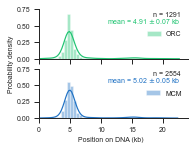

In [14]:
proteins = ['ORC','MCM']
pal_pos = 1

fig,axes = plt.subplots(len(proteins),1,sharex=True,sharey=True)

for i, protein in enumerate(proteins):
    sns.distplot(df.filter(regex=(protein+"_"),axis=1).xs('start_site',level='properties',axis=1)/1000,
                 label=f'{protein}',color=palettes[protein][pal_pos],bins = np.linspace(0, 25, 51), ax=axes[i])
    # mean+/- sem
    mean_start = pd.melt(df.filter(regex=(protein+"_"),axis=1).xs('start_site',level='properties',axis=1)/1000)['value'].median()
    sem_start = pd.melt(df.filter(regex=(protein+"_"),axis=1).xs('start_site',level='properties',axis=1)/1000)['value'].sem()
    axes[i].text(0.95, 0.85, f"mean = {round(mean_start,2)} $\pm$ {round(sem_start,2)} kb",
            verticalalignment='top', horizontalalignment='right',
            transform=axes[i].transAxes,color=palettes[protein][pal_pos])

    axes[i].text(0.95, 0.95, f"n = {len(pd.melt(df.filter(regex=(protein+'_'),axis=1).xs('start_site',level='properties',axis=1))['value'].dropna())}",
            verticalalignment='top', horizontalalignment='right',
            transform=axes[i].transAxes)

for ax in axes:
    ax.set_xlim(0,24)
    ax.set_ylim(0,0.75)
    ax.legend(frameon=False,loc=7)

fig.text(0.5, -0.04, 'Position on DNA (kb)', ha='center', rotation='horizontal')
fig.text(-0.04, 0.5, 'Probability density', va='center', rotation='vertical')

sns.despine()
#plt.tight_layout()

plt.savefig(dir_out+'1B_ORC-MCM_loading_sites.svg',transparent=True)


### Figure S1D: ORC-MCM loading sites - hue nucleotide

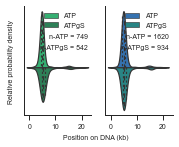

In [15]:
_plot_df = pd.DataFrame(columns=['start_site','nucleotide','protein'])
proteins = ['ORC','MCM']
for protein in proteins:
    for nuc in df['nucleotide'].unique():
        _temp_df = pd.DataFrame(data=pd.melt(df[df['nucleotide']==nuc].filter(regex=(protein+"_"),axis=1).xs('start_site',level='properties',axis=1)/1000)['value'].dropna())
        _temp_df.columns = ['start_site']
        _temp_df['nucleotide'] = nuc
        _temp_df['protein'] = protein
        _plot_df = pd.concat([_plot_df,_temp_df])

fig,axes = plt.subplots(1,2,sharex=True,sharey=True)


sns.violinplot(x='start_site',y=['dummy_label']*len(_plot_df[_plot_df['protein']=='ORC']),hue='nucleotide',data=_plot_df[_plot_df['protein']=='ORC'], 
                split=True,inner='quartile', scale='area',ax=axes[0], palette=[palettes['ORC'][1],palettes['ORC'][3]], hue_labels=[1,2])
sns.violinplot(x='start_site',y=['dummy_label']*len(_plot_df[_plot_df['protein']=='MCM']),hue='nucleotide',data=_plot_df[_plot_df['protein']=='MCM'], 
                split=True,inner='quartile', scale='area',ax=axes[1], palette=[palettes['MCM'][1],palettes['OCCM'][1]], hue_labels=[1,2])

for i, protein in enumerate(proteins):
    axes[i].set_xlabel(None)
    axes[i].set_yticklabels([])
    axes[i].set_yticks([])
    axes[i].text(0.95, 0.75, f"n-ATP = {len(_plot_df[(_plot_df['protein']==protein) & (_plot_df['nucleotide']=='ATP')])}",
            verticalalignment='top', horizontalalignment='right',
            transform=axes[i].transAxes)
    axes[i].text(0.95, 0.65, f"n-ATPgS = {len(_plot_df[(_plot_df['protein']==protein) & (_plot_df['nucleotide']=='ATPgS')])}",
            verticalalignment='top', horizontalalignment='right',
            transform=axes[i].transAxes)

    axes[i].legend(frameon=False)

sns.despine()
fig.text(0.5, -0.04, 'Position on DNA (kb)', ha='center', rotation='horizontal')
fig.text(0.04, 0.5, 'Relative probability density', va='center', rotation='vertical')


#plt.tight_layout()

plt.savefig(dir_out+'S1D_ORC-MCM_loading_sites_hueNuc.svg',transparent=True)
